<a href="https://colab.research.google.com/github/MayankChandola/Car_Price_Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
from sklearn.preprocessing import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (30, 30)})
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/data (1).csv")

In [ ]:
data.shape

(11914, 16)

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


** Countplot**
Countplots are used with the help of seaborn library in python. These plots give us a good understanding of the total number of elements present in a particular feature that we have considered. Below are a list of countplots for different features of interest which would help in understanding the overall distribution of data based on different features. Therefore, taking a look at these plots would ensure that one is familiar with the data along with the total number of classes for different features respectively.


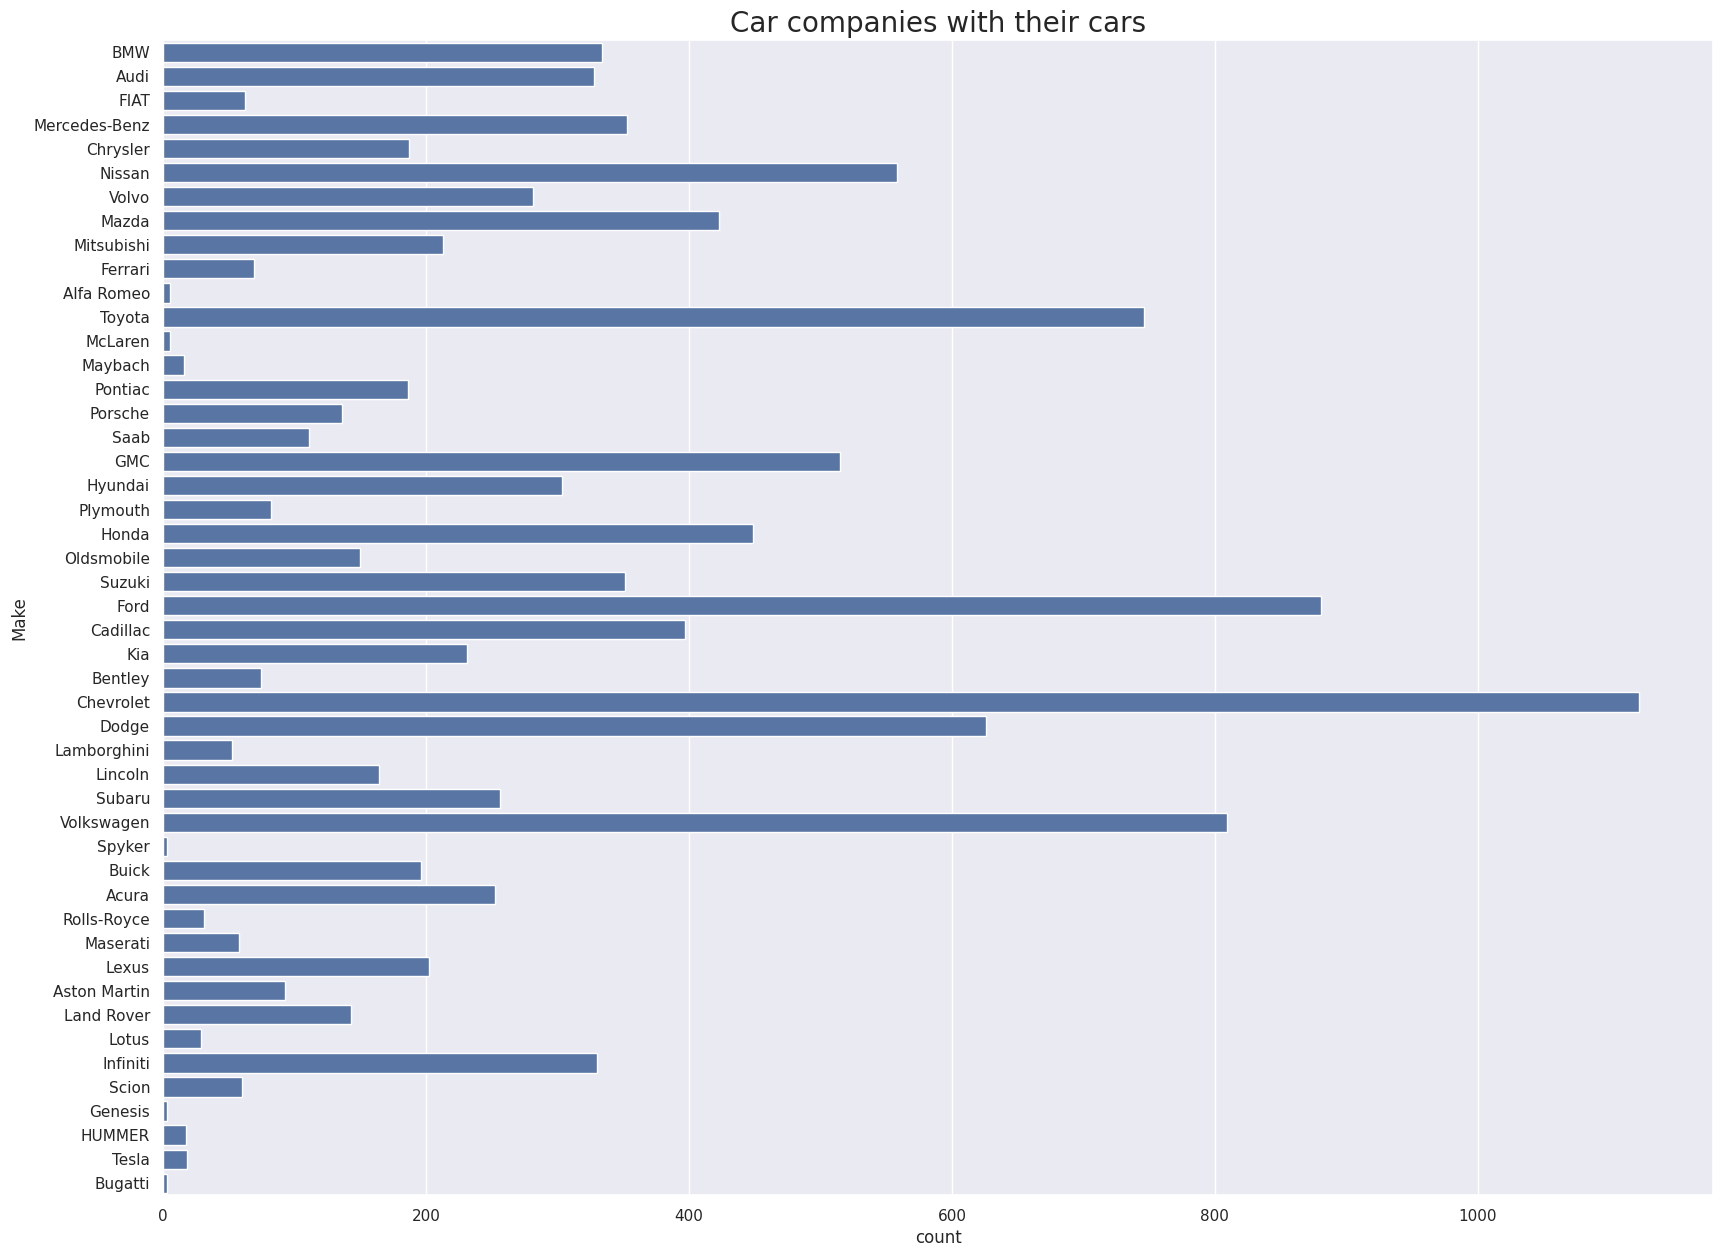

In [ ]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

** Countplot of the total cars per different years**
We would be checking the total number of cars per year just to understand the data. We find that there are many cars in the years 2015 to 2017 compared to the other years in our dataset. From this visualization, we can get an understanding that most of our data contains recent values. This is a good dataset as we are more interested in the prices of the future cars. It would be better if we have the most recent values as they would help us well in our predictions.

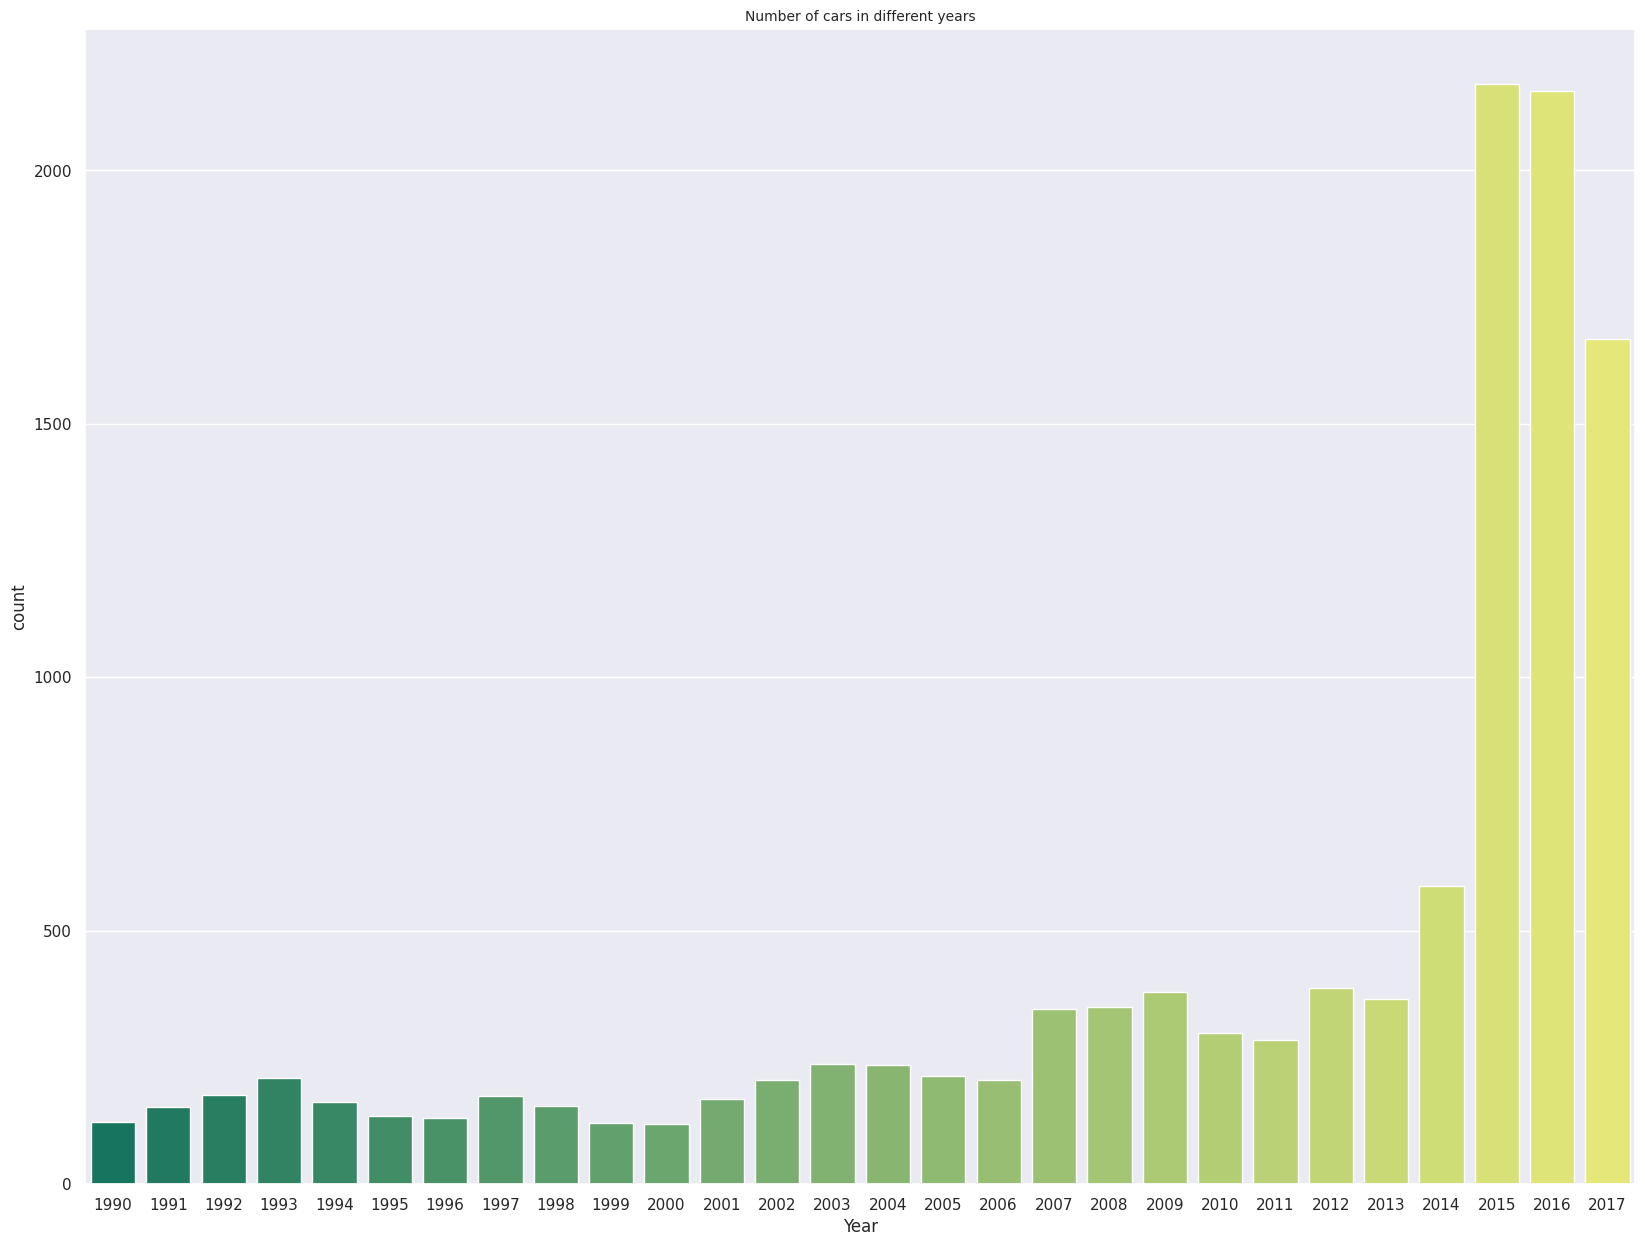

In [ ]:
x1 = data.Year
plt.figure(figsize = (20, 15))
sns.countplot(x = x1, palette = 'summer')
plt.title("Number of cars in different years", fontsize = 10)
plt.show()

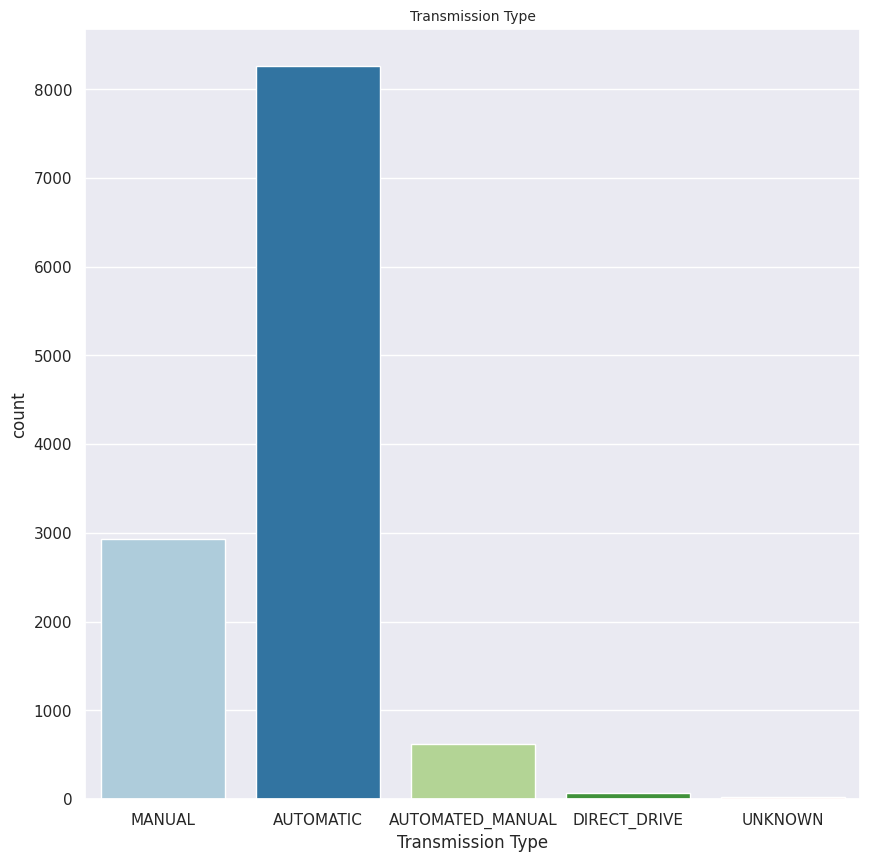

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(x = data['Transmission Type'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 10)
plt.show()

**Getting the unique elements from the data**
We see from the below that there are a few categories for features such as 'Number of Doors', 'Vehicle Size', 'Driven_Wheels' and so on. That is what is expected as we should not have a lot of categories for the above mentioned features. In addition to this, we see that there are a few features that contain a lot of categories. Some of the features include 'Model', 'Engine HP' and so on. That is also what is expected in real life as we should have different models for cars and also different values of horsepower (hp).

In [ ]:
data.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,356
Engine Cylinders,9
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,71


** Countplot of Vehicle Size**
There are mostly compact cars in our data followed by Midsize cars. There are just a few cars that are large compared to compact and midsize cars. This is typical of the real world data as we don't have a lot of cars that are large. We see a lot of cars to be compact and midsize in real life too!

<Axes: xlabel='Vehicle Size', ylabel='count'>

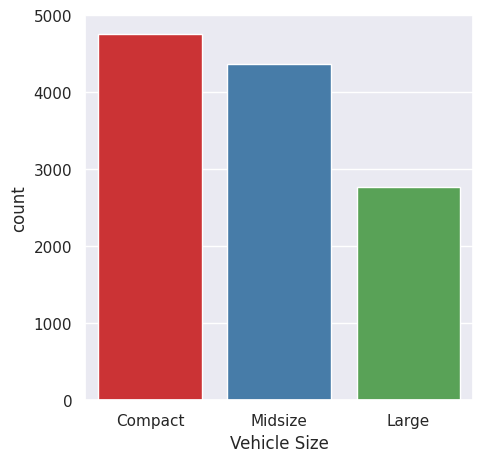

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

In [ ]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


**Groupby with 'Make' feature**
We would be making use of groupby which would take into consideration the feature that would be grouped on and it would perform different operations after grouping such as finding the minimum element in particular group, maximum element in a particular group and so on. Therefore, we would be making use of this in groupby as it makes life simple in python. Here, we see that we have grouped the data on the basis of 'Make' and considered a few features such as 'Engine HP', 'Engine Cylinders', 'highway MPG' and 'city mpg'. We would be then looking at the maximum values, minimum values and mean of the data. We could see a very good depiction of the result below

In [ ]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

**Grouping the data on the basis of Year**
We would now be grouping the data on the basis of year and check the average prices of cars for the years of cars. Looking at the plot below, we see that the average prices of cars was the highest in the year 2014 followed by the year 2012. The average prices of cars that are in the year 2000 and below are pretty low as can be easily seen from the plot. On average, we also find an interesting trend. As the years increase, we could see that the average prices of cars keep increasing but not in a steady way.

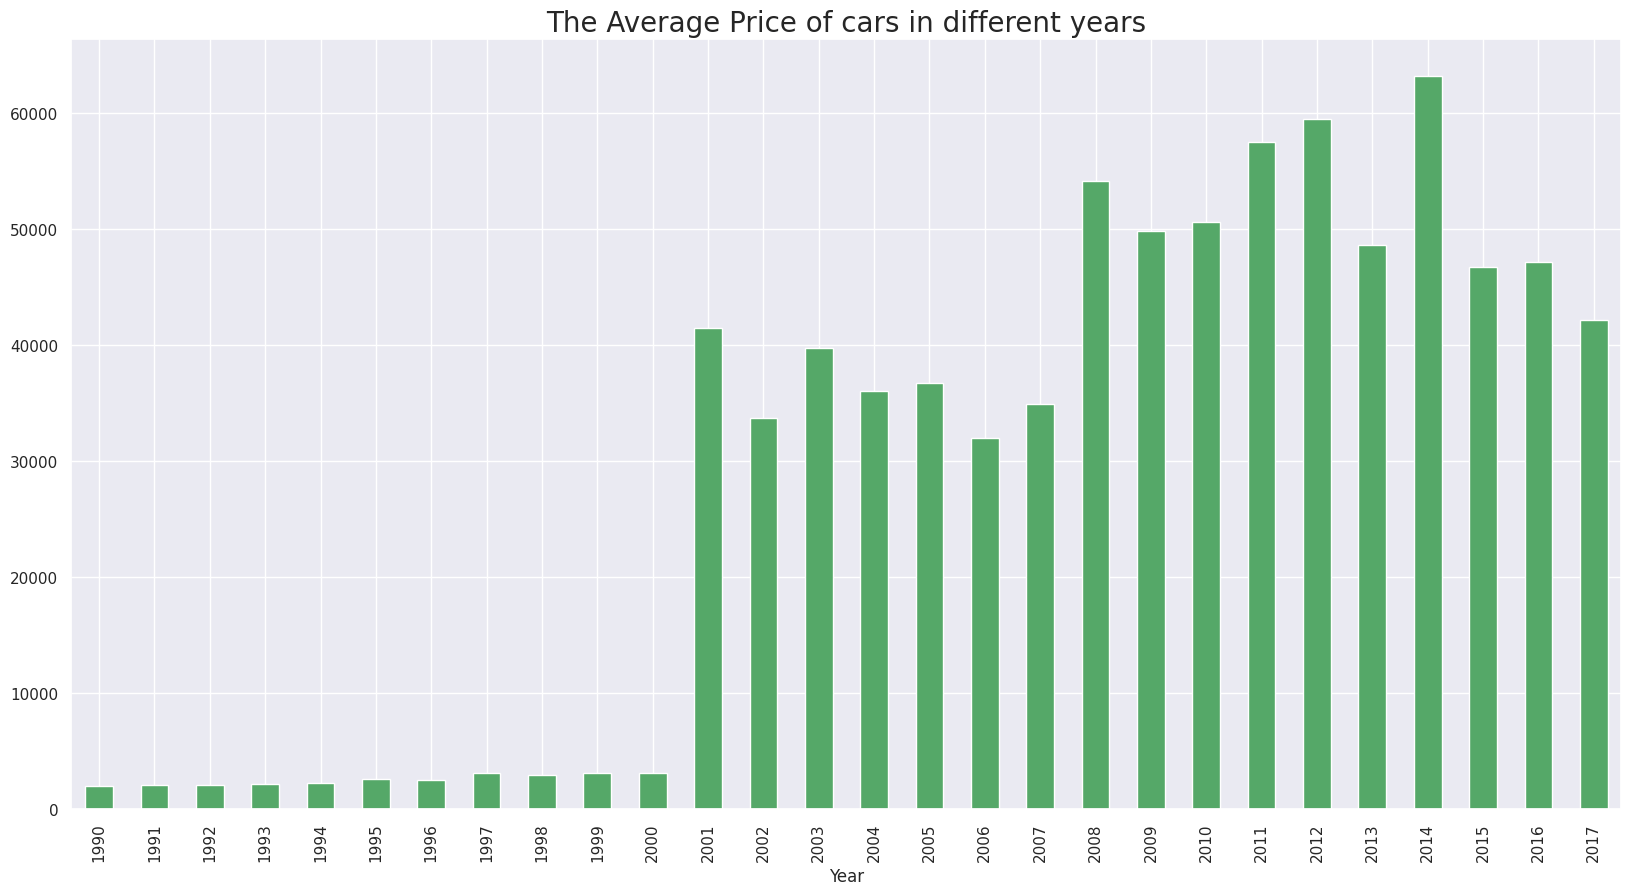

In [ ]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

 **Grouping on the basis of Transmission Type**
We would be grouping the data on the basis of transmission type and check the average prices of cars. We see that automated_manual cars have the highest average price. That is being followed by automatic cars. We expect the prices of cars that are manual to be low compared to the prices of cars that are automatic. That is being reflected in the graph below.

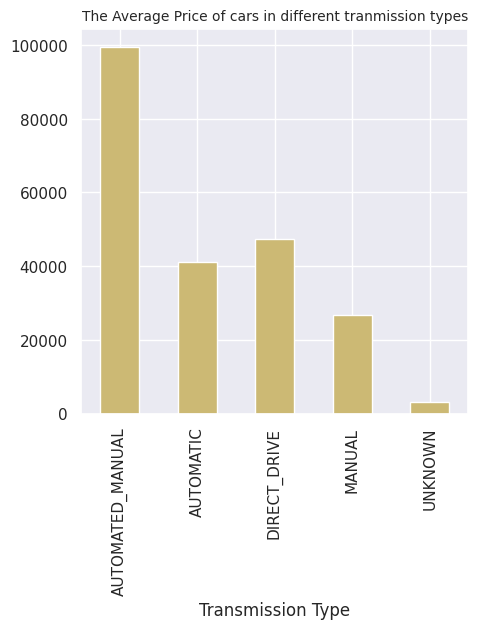

In [ ]:
plt.figure(figsize = (5, 5))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 10)
plt.show()

**Grouping on the basis of Make with 'MSRP' values**
We would now be grouping on the basis of make and check the average prices of cars of particular makes. We should surely be expecting Bugatti to the most expensive car. In fact, it is the most expensive car in the world. Hope we buy the car anytime soon! (Just kidding). We see that the average price of Bugatti Veyron is about 1.75 million dollars. It is way too expensive compared to the other cars. There are other cars such as Maybach and Rolce-Royce that are also expensive if we remove Bugatti from our list. We see that the least expensive car is Plymouth.

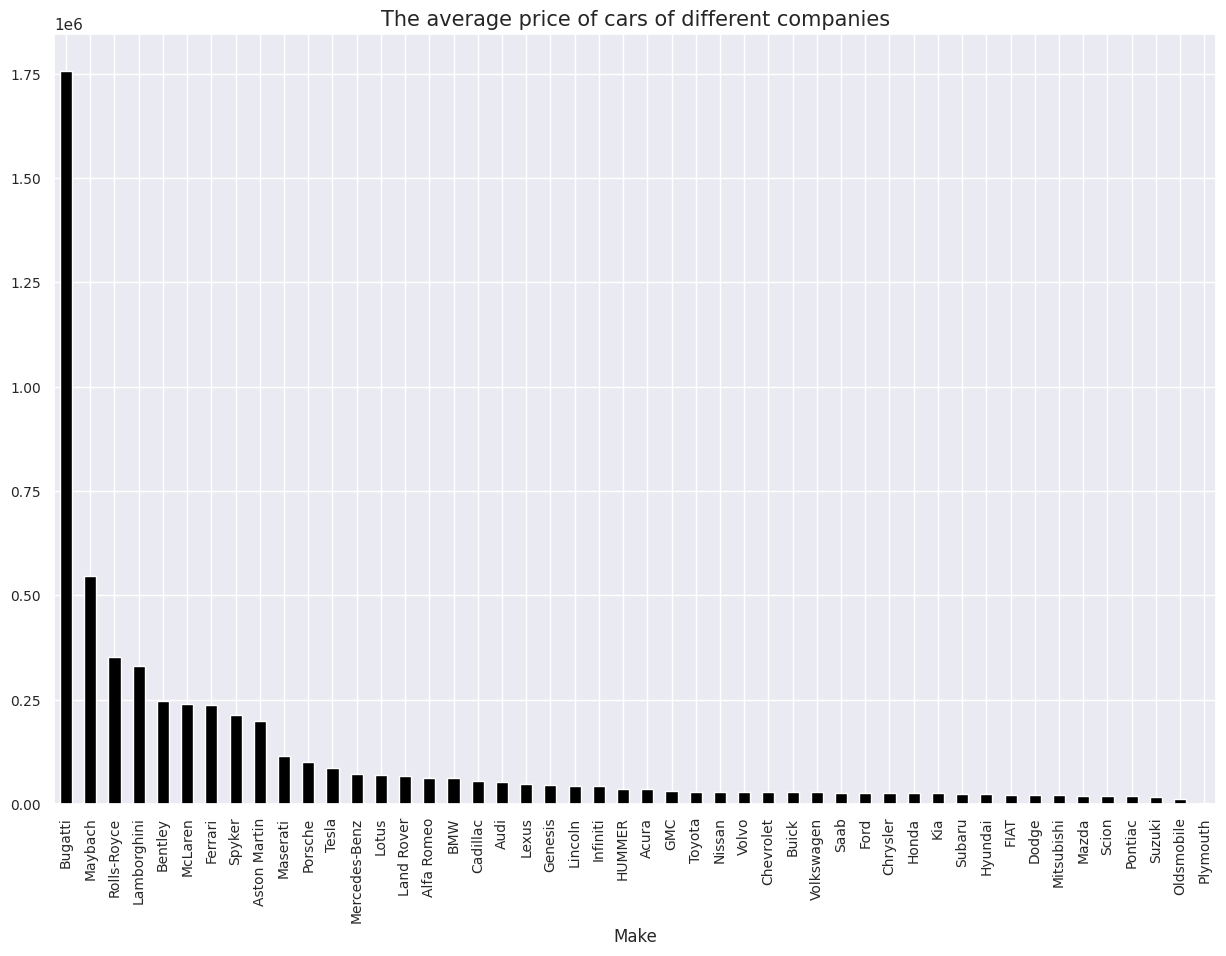

In [ ]:
plt.figure(figsize = (15, 10))
data.groupby(['Make'])['MSRP'].mean().sort_values(ascending = False).plot(kind = 'bar', fontsize = 10, color = 'black')
plt.title("The average price of cars of different companies", fontsize = 15)
plt.show()

**Grouping on the basis of Make with 'Popularity' values**
We would group the data on the basis of make and find the average popularity of different cars. We see that 'Ford' is very popular all around our data. It is being followed by 'BMW' and 'Audi' respectively. We see that there are other car makers such as 'Lincoln' and 'Genesis' that are not so popular. 'Toyota' is also a popular brand and is present in the plot below.

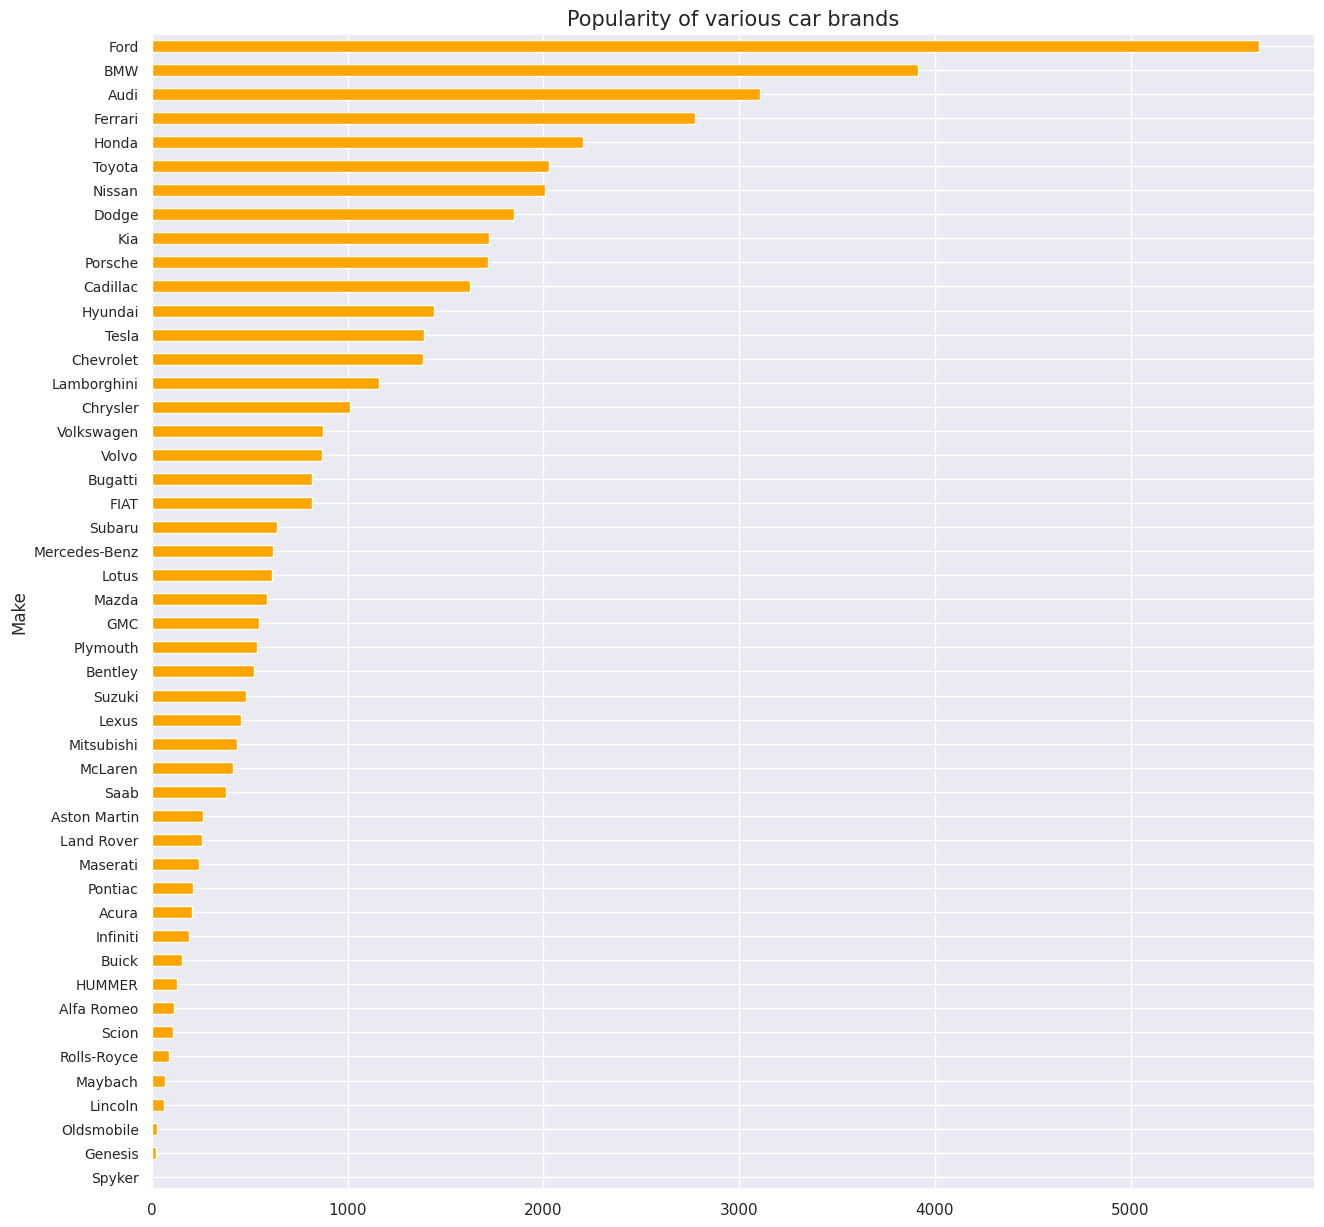

In [ ]:
plt.figure(figsize = (15, 15))
data.groupby('Make')['Popularity'].mean().sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.yticks(fontsize = 10)
plt.title("Popularity of various car brands", fontsize = 15)
plt.show()

**Scatterplot between 'highway MPG' and 'city mpg'**
We should be expecting a linear relationship between 'highway MPG' and 'city mpg' as they are very much correlated with each other. We cannot have cars, in general, that have a city mileage that is very much different from highway mileage. In the plot below, we see that there is one outlier where the highway MPG is about 350. There are no cars that have that high mileage. We can remove the outlier as it would affect our results as errors in the data are costly when performing the machine learning operations.

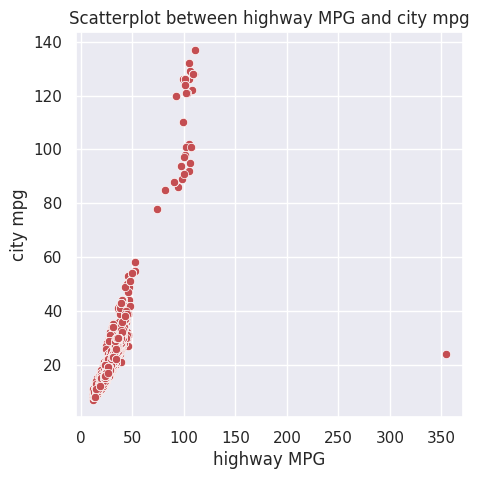

In [ ]:
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

We would be removing the outlier in our data where the highway MPG is about 350.

In [ ]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [ ]:
data = data[data['highway MPG'] < 350]

We would now be using a scatterplot as the above but with removing the outliers. We see almost a linear line between the two features that we have considered and that is what is expected.

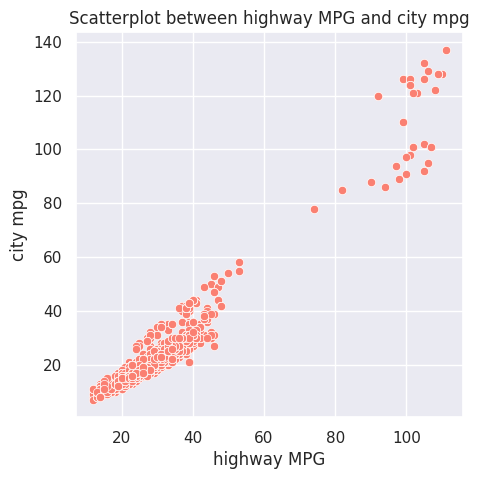

In [ ]:
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

**Boxplot**
Boxplots give us a good understanding of how the data values are spread for different features. We could get to know the 25th, 50th and 75th percentile values present in different features. In addition, the outliers could also be detected by making use of a formula and considering the interquartile range which is the difference between the 75th percentile and 25th percentile respectively.

 **Boxplot of highway MPG**
We would now be using the boxplot of highway MPG and calculate the average values and how the distribution is spread. We see that the average values are about 25 for highway MPG and we see the maximum value being equal to about 40 and the points above that to be outliers. We see that the data is not so spread as most of the values lie between 21 and 30 respectively

<Axes: xlabel='highway MPG'>

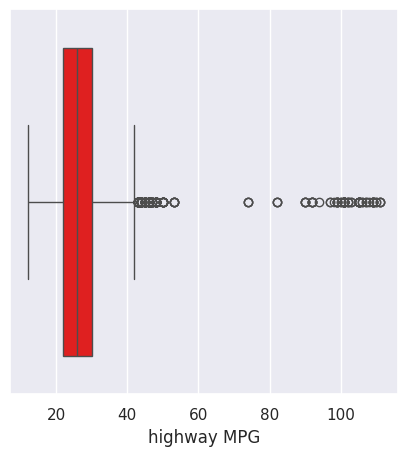

In [ ]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'highway MPG', data = data, color = 'red')

**Calculating percentiles of highway MPG**
We would now print the highway percentile values to get a better understanding of the outliers in our data. We see that we cannot distinguish the outliers in the below print statements. We would be using more granularity and then calculate the percentile values and spot the outliers in our data.

In [ ]:
for i in range(90, 100):
    percentile_value = np.percentile(data['highway MPG'], i)
    print(f"The {i:.1f}th percentile value is {percentile_value:.2f}")


The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


We see that 99.5th percentile values and so on have very high values and can be considered as outliers. Therefore, we have to remove those outliers so that they don't disturb our data and machine learning algorithms perform well with the data once the outliers are removed.

In [ ]:
for i in [x * 0.1 for x in range(990, 1000)]:
    percentile_value = np.percentile(data['highway MPG'], i)
    print(f"The {i:.1f}th percentile value is {percentile_value:.2f}")


The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


In [ ]:
data = data[data['highway MPG'] < 60]

We would once again plot the boxplot and see how the values are split for highway MPG. We find that the highway MPG is more skewed towards the right. We see a lot of values to the right of the mean. What this means is that more than 50 percent of the values are above 24 (mean).

<Axes: xlabel='highway MPG'>

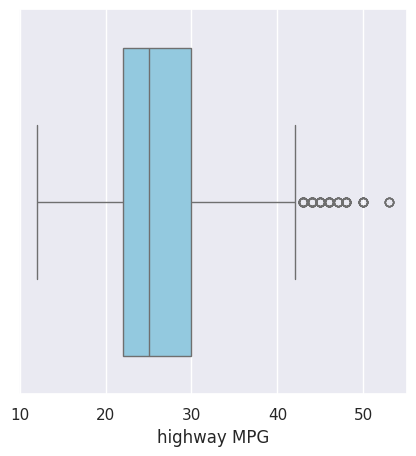

In [ ]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'highway MPG', data = data, color = 'skyblue')

<Axes: xlabel='city mpg'>

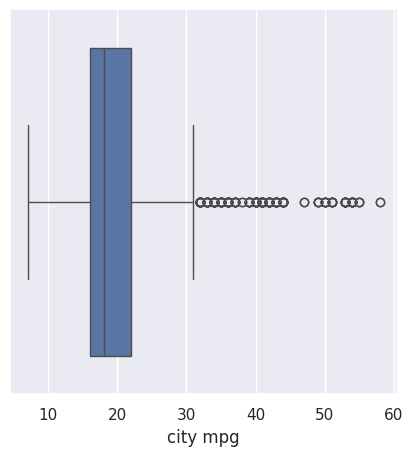

In [ ]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'city mpg', data = data)

In [ ]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


In [ ]:
data = data[data['city mpg'] < 40]

**Boxplot of 2 features 'city mpg' and 'highway MPG'**
We would be looking at the 2 features 'city mpg' and 'highway MPG' respectively. We see that in terms of 'city mpg' most of the values that are present are in the range between 15 to 22 respectively. On the other hand, we find that most of the values that are present in 'highway MPG' are in the range 22 to 30 respectively. Therefore, we can see how the values are spread in the boxplot and see there the spread actually take place by comparing the features.

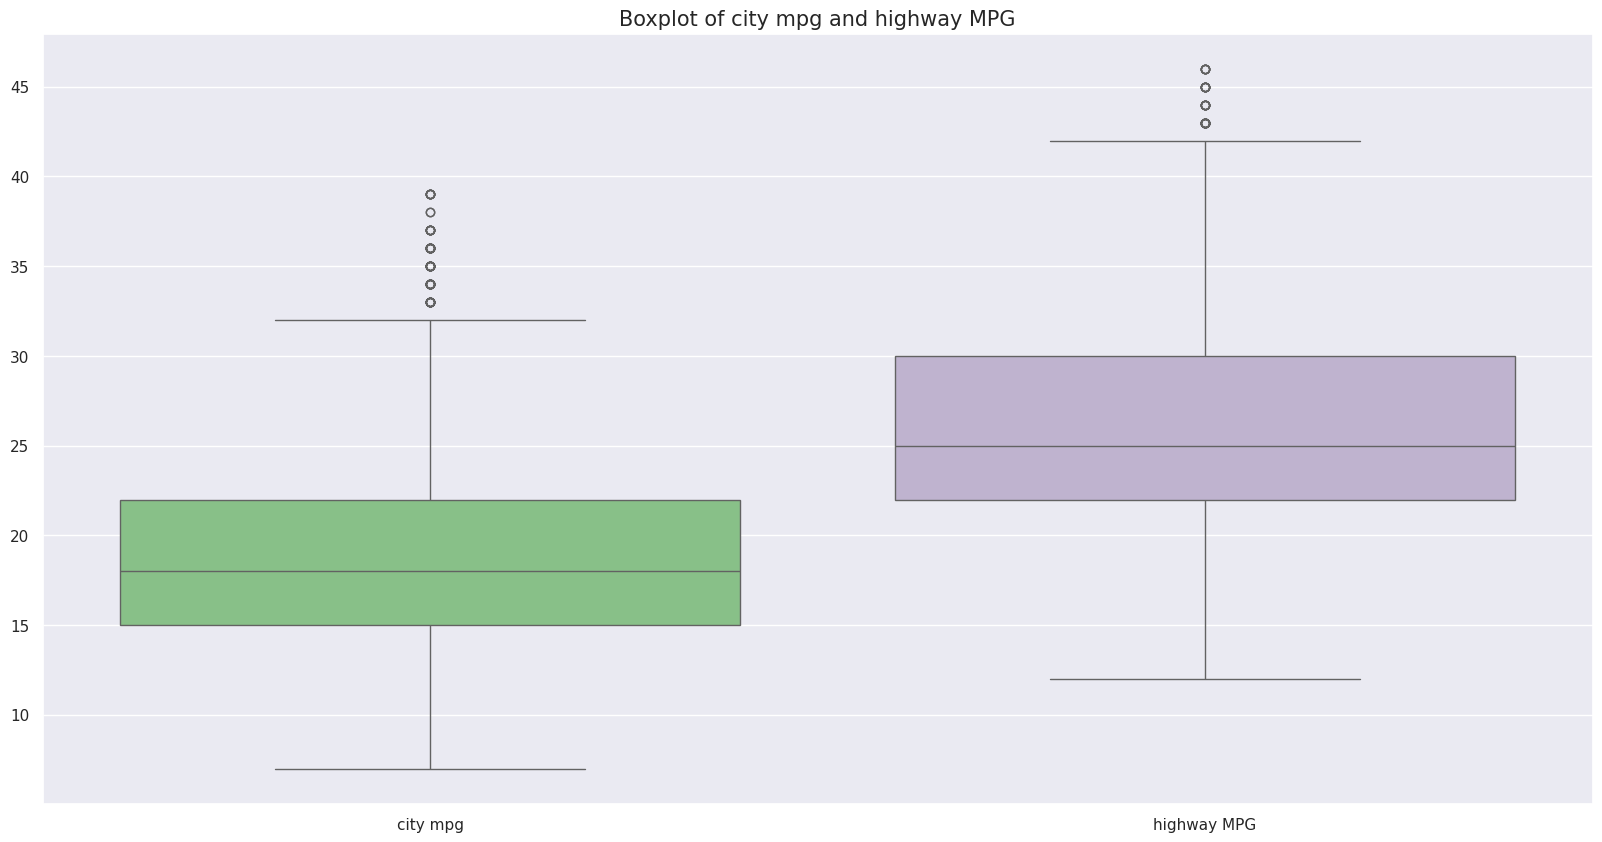

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

**Heatmap**
One of the cool features of python is the heatmap. We would be able to consider some of the important values that are present such as 'Engine HP', 'Engine Cylinders' and 'Number of Doors'. We would be taking the features that are numerical and we would be using the plots and see the correlation between them. We see that 'highway MPG' and 'city mpg' are highly correlated. That is the reason that we got a value of about 0.94 respectively. In addition to this, we see that 'Engine Horsepower' and 'Engine Cylinders' are correlated. That is true as having a higher number of cylinders would ensure that there is a high horsepower on a car

<Axes: >

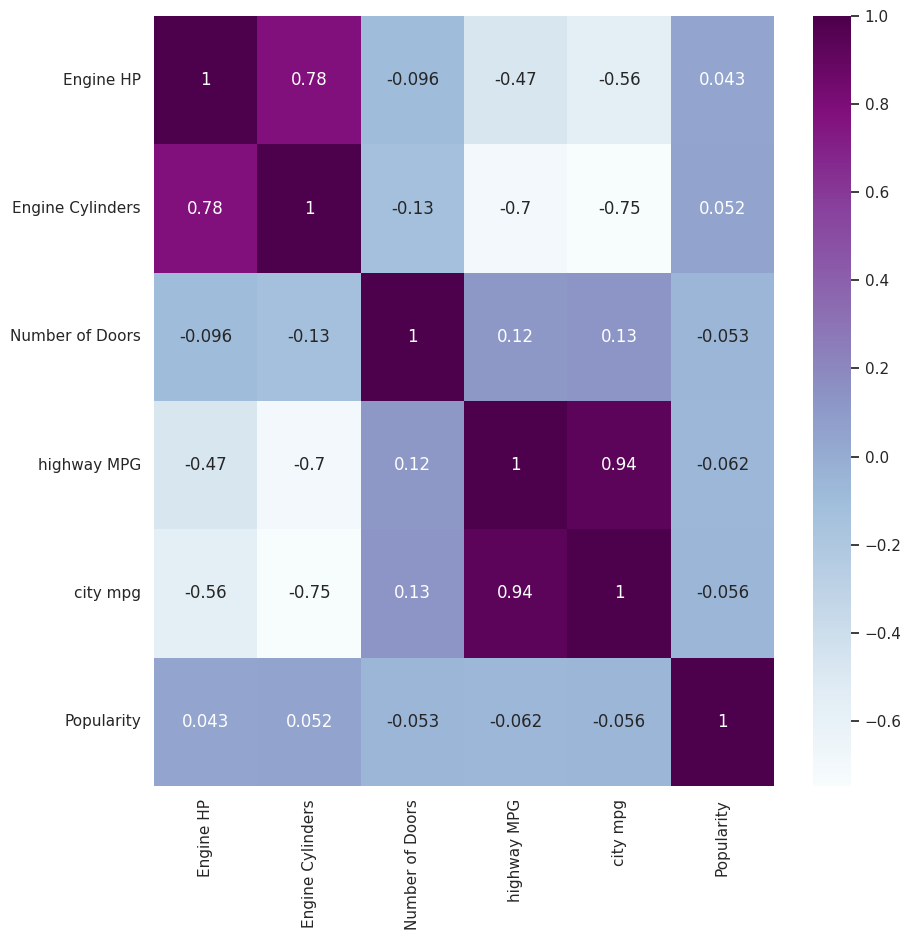

In [ ]:
plt.figure(figsize = (10, 10))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

**Checking the NULL values**
Now, it is time to check the null values and see if there are any missing data values. We see that there are a few features that have missing values. We see some features such as 'Engine Fuel Type' and 'Engine HP' that are missing. We have to fill those missing values as our machine learning model cannot deal with missing values though there are some algorithms that can solve the problem.

In [ ]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,21
Engine Cylinders,20
Transmission Type,0
Driven_Wheels,0
Number of Doors,1
Market Category,3737


We would be calculating the median values of 'Number of doors' so that we can fill the missing values with the median value.

In [ ]:
data['Number of Doors'].median()

4.0

In [ ]:
data['Number of Doors'].fillna(4.0, inplace = True)

**Creating a new column**
We would now try to add a new feature which is used to calculate the difference between the present year and the year of manufacture of the car so that we can take into consideration the depreciation amount which can be done by the machine learning models. Therefore, we create a new column called 'Present Year' and we make it equal to 2024 respectively. We would then subtract the 'Year of manufacture' values with these values of the car so that we get the total number of years the car has been out.

In [ ]:
data['Present Year'] = 2024

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2024
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2024
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2024
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2024
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2024


Now it is the time to create a new column called 'Years of Manufacture' respectively. We would be doing the subtraction of the 'Present Year' from the 'Year' which is nothing but the year of manufacture. It would be better to plot the graph and see how the graph looks like in the notebook.

In [ ]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

Filling the null values

In [ ]:
data.drop(['Present Year'], inplace = True, axis = 1)

In [ ]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [ ]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)

In [ ]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

In [ ]:
data['Engine Cylinders'].fillna(4, inplace = True)

In [ ]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,3737


Below we are dropping the 'Market Category' feature and making the inplace = True which shows that the feature is removed.

In [ ]:
data.drop(['Market Category'], inplace = True, axis = 1)

In [ ]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


**Shuffling the data**
 It is very important to shuffle the data randomly so that we get outputs differently and we would be dealing with data without any particular order or a particular timeframe.

In [ ]:
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

**Dividing the data into training and testing set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (9364, 15)
The size of the output train data is: (9364,)
The size of the input test data is: (2341, 15)
The size of the output test data is: (2341,)


**Encoding the data**
When we are doing any machine learning applications, it is important to encode the data so that we would be able to convert the data in the form of categorical features so that we would be working on the data that is mathematical rather than categorical. Therefore, we would be converting the categorical feature into numerical features so that we are going to be using the mathematical vectors for our machine learning applications.

There are different encoding techniques that we would be taking into consideration and we are making sure that we get the best output values associated with each of them. You can check out the link below to see the different encoding techniques to convert the cateogrical values into numerical features respectively.

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder, OneHotEncoder

In [ ]:
encoder = TargetEncoder(cols = 'Year')

In [ ]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,2003,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,Saab,900,1997,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,Chevrolet,C/K 1500 Series,1997,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,Aston Martin,V8 Vantage,2015,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,Honda,Civic,2015,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


We would be doing the target encoding here where we would replace the values with the average values of the 'MSRP' whenever we find a value associated with it. This would make it easier for the machine learning model as we are already giving the output values to it so that there is no need to encode further.

In [ ]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )

TargetEncoder(cols=['Year'])

In [ ]:
X_train['Year'] = encoder.transform(X_train['Year'])

In [ ]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [ ]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,Saab,900,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,Chevrolet,C/K 1500 Series,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,Aston Martin,V8 Vantage,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,Honda,Civic,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


In [ ]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

In [ ]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,Saab,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,Chevrolet,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,Aston Martin,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,Honda,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


In [ ]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [ ]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,10812.757938,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,28423.023983,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,28230.392090,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,196884.138144,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,26660.798742,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


 **One Hot Encoding**
Now we would be making use of the one hot encoding. One hot encoding is a technique where each category in a feature is converted into a feature and set to 1 once the particular value is present in the data.

In [ ]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

In [ ]:
one_hot_encoded_output_train.head()

,Engine Fuel Type_1,Engine Fuel Type_2,Engine Fuel Type_3,Engine Fuel Type_4,Engine Fuel Type_5,Engine Fuel Type_6,Engine Fuel Type_7,Engine Fuel Type_8,Engine Fuel Type_9,Engine Fuel Type_10,...,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15,Vehicle Style_16
1354,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2635,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11165,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2554,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [ ]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15,Vehicle Style_16
1354,10812.757938,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,...,0,0,0,0,0,0,0,0,0,0
896,28423.023983,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,0,0
2635,28230.392090,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,...,0,0,0,0,0,0,0,0,0,0
11165,196884.138144,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,0,0,0,0,0,0
2554,26660.798742,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,...,0,0,0,0,0,0,0,0,0,0


We have concatenated the features with the X_train and X_test and remove the actual categorical features as they should not be given to the machine learning algorithms respectively.

In [ ]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9364 entries, 1354 to 2564
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  9364 non-null   float64
 1   Model                 9364 non-null   float64
 2   Year                  9364 non-null   float64
 3   Engine HP             9364 non-null   float64
 4   Engine Cylinders      9364 non-null   float64
 5   Number of Doors       9364 non-null   float64
 6   highway MPG           9364 non-null   int64  
 7   city mpg              9364 non-null   int64  
 8   Popularity            9364 non-null   int64  
 9   Years Of Manufacture  9364 non-null   int64  
 10  Engine Fuel Type_1    9364 non-null   int64  
 11  Engine Fuel Type_2    9364 non-null   int64  
 12  Engine Fuel Type_3    9364 non-null   int64  
 13  Engine Fuel Type_4    9364 non-null   int64  
 14  Engine Fuel Type_5    9364 non-null   int64  
 15  Engine Fuel Type_6    9

**Standardization of the data**
We would be considering the values of our data and perform some operations such as standardization and normalization before giving the data to the machine learning algorithms. We would be transforming the features that are present in the data and convert the values using the minmaxscaler respectively.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [ ]:
error_mean_square = []
error_mean_absolute = []

**Linear Regression**
We would now be working with linear regression model and understand the data fully. We see that one of the best ways for predicting the regression values or the continuous output is to use linear regression as it is straightforward. We have to first give the training data including the training output

In [ ]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(X_test_new)

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
error_mean_absolute

[13253]

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [ ]:
y_predict.head()

,Predicted Output
0,11932.269053
1,18180.110310
2,71540.949096
3,29414.645783
4,307259.662158


In [ ]:
y_test.to_frame().head()

,MSRP
8780,24660
674,2000
6569,49770
11368,20875
3548,284976


In [ ]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [ ]:
results.head()

,Predicted Output,MSRP
0,11932.269053,24660
1,18180.110310,2000
2,71540.949096,49770
3,29414.645783,20875
4,307259.662158,284976


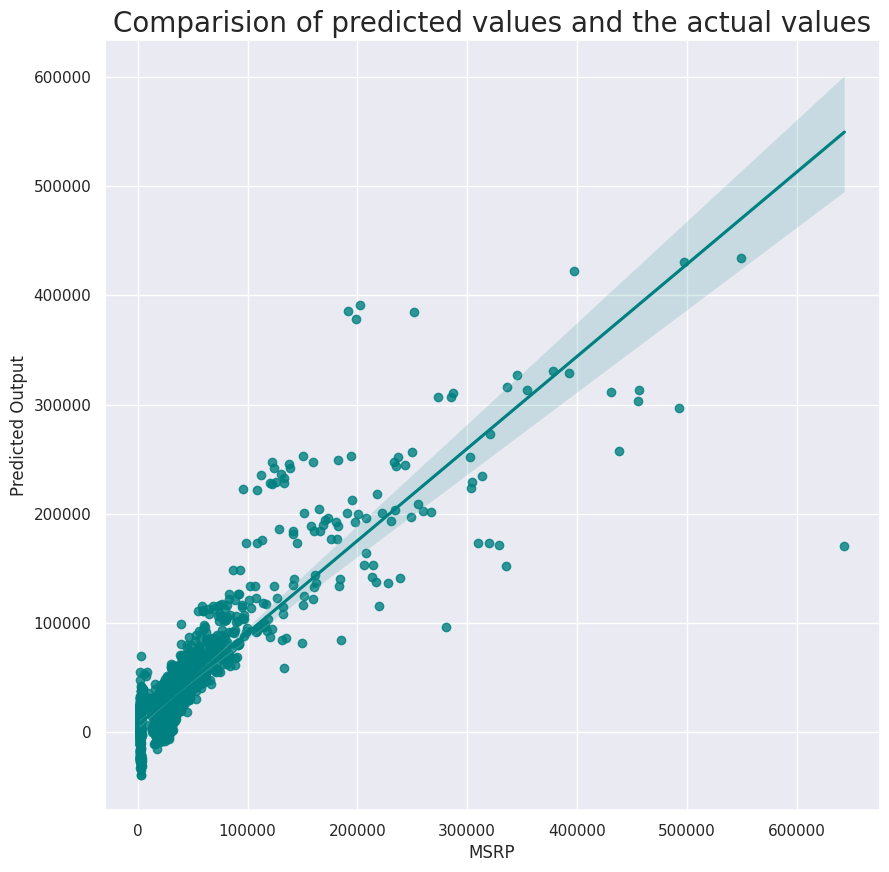

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

**Decision Tree Regressor**

In [ ]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

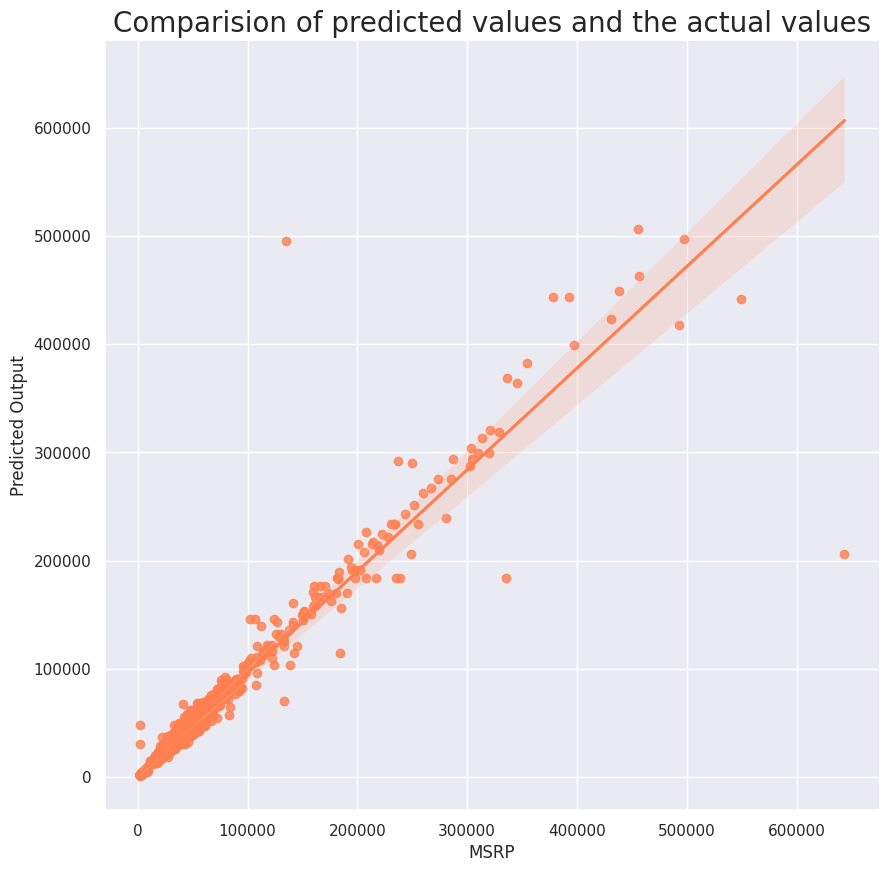

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

**Gradient Boosting Regressor**

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

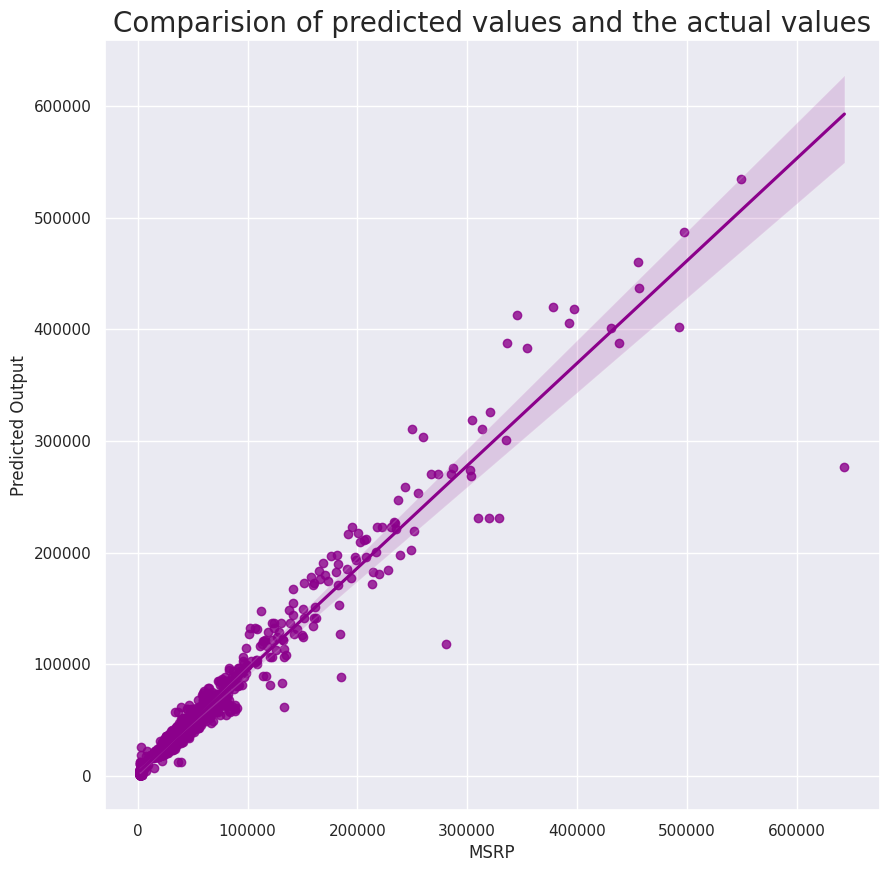

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
data = {'Models': ['Linear Regression','Decision Tree Regressor', 'Gradient Boosting Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)

From below we can conclude that it is better to use the 'Decision Tree Regressor' for deploying and for predictions in the future as it has the lowest mean absolute error

In [ ]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,13253,596724778
1,Decision Tree Regressor,3471,189363011
2,Gradient Boosting Regressor,4355,135245301


**Conclusion**
We can see that using different machine learning models would lead to different values of mean absolute error and mean squared error respectively.
We would have to first convert all the categorical features into numerical features before we give those data points to the machine learning models for prediction. If we just give categorical features directly, there would be an error in the machine learning models respectively.
It is always good to shuffle the data before we split the data into training and testing set. This is done so that we have more randomness in the training data so that the machine learning models would work well on new data.
We have to always ensure that there are no missing values in our data. We have to replace those values so that there is no problem when we are using different machine learning models for prediction.
We have to also remove the outliers in our data as they would completely change some of the important predictions and lead to an increase in the error respectively.